# DSC 540
# Week 9&10
# Author: Muthukumar Kadhirvel
# 5/20/2022

# Milestone 4

In [1]:
# Create a pandas dataframe based on the OMDB API
import urllib.request, urllib.parse, urllib.error
import json
import requests
import itertools
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
with open('APIkeys.json') as f:
    key = json.load(f)
    secretapikey = key['key']
serviceurl = 'http://www.omdbapi.com/?'
apikey = '&apikey='+secretapikey
movie_list = []
# Search the movie based on the imdbID in the OMDB API from the get_imdb_ID function
def search_movie(imdbID):
    url = serviceurl + urllib.parse.urlencode({'i':str(imdbID)})+apikey
    response = requests.get(url)
    movie_data = response.json()
    if movie_data['Response'] == 'True':
        movie_list.append(movie_data)
# Call OMDB API with the three byte search string and it can return upto 10 rows per call
#   Use the returned imdbID and call search_movie to return the actual movie details
def get_imdb_ID(movie):
    url = serviceurl + urllib.parse.urlencode({'s':str(movie)})+apikey
    response = requests.get(url)
    movie_data = response.json()
    if movie_data['Response'] == 'True':
        for i in range(int(movie_data['totalResults'])):
            if i <= 9:
                search_movie(movie_data['Search'][i]['imdbID'])
# Using itertools generate the keywords list that has various 3 byte search combinations of alphabets
alphabets = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']
keywords = list(itertools.product(alphabets, repeat = 3))
for i in itertools.islice(keywords, 1000):
    search_string = ''.join(i)
    get_imdb_ID(search_string)
movie_orig_df = pd.DataFrame(movie_list)
size_initial = len(movie_orig_df)
print(movie_orig_df.head())

                                             Title       Year Rated  \
0                                      Zeg 'ns Aaa  1981–2010   N/A   
1  A.A.A. Massaggiatrice bella presenza offresi...       1972   N/A   
2                                   A.A.A. Achille       2003   N/A   
3        AAA, la película: Sin límite en el tiempo       2010   N/A   
4       AAA Championships at Fartown, Huddersfield       1901   N/A   

      Released Runtime         Genre           Director  \
0  01 Jan 1981  23 min        Comedy                N/A   
1  28 Jul 1972  85 min      Thriller    Demofilo Fidani   
2  13 Jun 2003  82 min        Comedy  Giovanni Albanese   
3  22 Jan 2010  90 min     Animation  Alberto Rodriguez   
4  30 Jul 2007   4 min  Short, Sport                N/A   

                                  Writer  \
0   Chiem van Houweninge, Alexander Pola   
1  Demofilo Fidani, Mila Vitelli Valenza   
2                        Vincenzo Cerami   
3                David Hernández Miranda  

Step 1 - Drop unnecessary rows                                                                                              
We are passing all the rows that have the Type as movie

In [2]:
movie_df = movie_orig_df.loc[movie_orig_df['Type'] == 'movie']
print(movie_df.head())

                                               Title  Year Rated     Released  \
1    A.A.A. Massaggiatrice bella presenza offresi...  1972   N/A  28 Jul 1972   
2                                     A.A.A. Achille  2003   N/A  13 Jun 2003   
3          AAA, la película: Sin límite en el tiempo  2010   N/A  22 Jan 2010   
4         AAA Championships at Fartown, Huddersfield  1901   N/A  30 Jul 2007   
5  Las AAA son las tres armas: Carta abierta de R...  1979   N/A          N/A   

  Runtime               Genre           Director  \
1  85 min            Thriller    Demofilo Fidani   
2  82 min              Comedy  Giovanni Albanese   
3  90 min           Animation  Alberto Rodriguez   
4   4 min        Short, Sport                N/A   
5  20 min  Documentary, Short        Jorge Denti   

                                  Writer  \
1  Demofilo Fidani, Mila Vitelli Valenza   
2                        Vincenzo Cerami   
3                David Hernández Miranda   
4                       

Step 2 - Drop Unnecessary columns                                                                                               
We are dropping the following columns as they have data that is irrelevant to the problem we are trying to solve.
Rated/Released/Plot/Awards/Poster/Ratings/Metascore/Type/totalSeasons/Response/DVD/BoxOffice/Production/Website

In [3]:
movie_df = movie_df.drop(['Rated','Released','Plot','Awards','Poster','Ratings','Metascore'], axis=1)
movie_df = movie_df.drop(['Type','totalSeasons','Response','DVD','BoxOffice','Production','Website'], axis=1)
print(movie_df.head())

                                               Title  Year Runtime  \
1    A.A.A. Massaggiatrice bella presenza offresi...  1972  85 min   
2                                     A.A.A. Achille  2003  82 min   
3          AAA, la película: Sin límite en el tiempo  2010  90 min   
4         AAA Championships at Fartown, Huddersfield  1901   4 min   
5  Las AAA son las tres armas: Carta abierta de R...  1979  20 min   

                Genre           Director  \
1            Thriller    Demofilo Fidani   
2              Comedy  Giovanni Albanese   
3           Animation  Alberto Rodriguez   
4        Short, Sport                N/A   
5  Documentary, Short        Jorge Denti   

                                  Writer  \
1  Demofilo Fidani, Mila Vitelli Valenza   
2                        Vincenzo Cerami   
3                David Hernández Miranda   
4                                    N/A   
5                                    N/A   

                                           Actors

Step 3 - Find Duplicates                                                                                                       
Title is the key field in our data frame and hence we check for duplicates and we are removing them

In [4]:
print("Does title have duplicates - "+str(any(movie_df.Title.duplicated())))
movie_df.drop_duplicates(subset ="Title", keep = False, inplace = True)
print(movie_df.head())

Does title have duplicates - True
                                               Title  Year Runtime  \
1    A.A.A. Massaggiatrice bella presenza offresi...  1972  85 min   
2                                     A.A.A. Achille  2003  82 min   
3          AAA, la película: Sin límite en el tiempo  2010  90 min   
4         AAA Championships at Fartown, Huddersfield  1901   4 min   
5  Las AAA son las tres armas: Carta abierta de R...  1979  20 min   

                Genre           Director  \
1            Thriller    Demofilo Fidani   
2              Comedy  Giovanni Albanese   
3           Animation  Alberto Rodriguez   
4        Short, Sport                N/A   
5  Documentary, Short        Jorge Denti   

                                  Writer  \
1  Demofilo Fidani, Mila Vitelli Valenza   
2                        Vincenzo Cerami   
3                David Hernández Miranda   
4                                    N/A   
5                                    N/A   

               

Step 4 - Format data into a more readable format                                                                               
runtime column has value as min which can be removed to make it a more readable format and also in hours

In [5]:
movie_df['Runtime'] = movie_df['Runtime'].str.strip('min')
movie_df['Runtime'] = movie_df['Runtime'].str.strip()
movie_df['Runtime'] = movie_df.Runtime.replace('N/A', np.nan)
movie_df = movie_df.dropna(subset=['Runtime'])
# For rows with value as X h Y min, we need to format it into Z where Z = X*60 + Y
for indx, i in enumerate(movie_df['Runtime']):
    if str(i).find('h') != -1:
        hour_min_list = i.rsplit('h',2)
        movie_df['Runtime'].iloc[indx] = str(int(hour_min_list[0].strip())*60 + int(hour_min_list[1].strip()))
print(movie_df.head())

                                               Title  Year Runtime  \
1    A.A.A. Massaggiatrice bella presenza offresi...  1972      85   
2                                     A.A.A. Achille  2003      82   
3          AAA, la película: Sin límite en el tiempo  2010      90   
4         AAA Championships at Fartown, Huddersfield  1901       4   
5  Las AAA son las tres armas: Carta abierta de R...  1979      20   

                Genre           Director  \
1            Thriller    Demofilo Fidani   
2              Comedy  Giovanni Albanese   
3           Animation  Alberto Rodriguez   
4        Short, Sport                N/A   
5  Documentary, Short        Jorge Denti   

                                  Writer  \
1  Demofilo Fidani, Mila Vitelli Valenza   
2                        Vincenzo Cerami   
3                David Hernández Miranda   
4                                    N/A   
5                                    N/A   

                                           Actors

Step 5 - Identify outliers and bad data    
We create boxplots for Runtime and then remove outliers.                                 
We started with 4803 rows and ended up with 2757 rows.

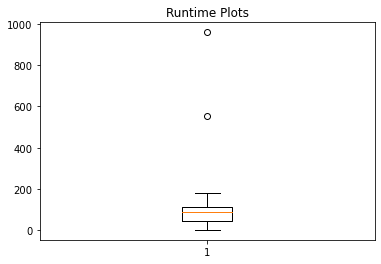

                                               Title  Year  Runtime  \
1    A.A.A. Massaggiatrice bella presenza offresi...  1972       85   
2                                     A.A.A. Achille  2003       82   
3          AAA, la película: Sin límite en el tiempo  2010       90   
4         AAA Championships at Fartown, Huddersfield  1901        4   
5  Las AAA son las tres armas: Carta abierta de R...  1979       20   

                Genre           Director  \
1            Thriller    Demofilo Fidani   
2              Comedy  Giovanni Albanese   
3           Animation  Alberto Rodriguez   
4        Short, Sport                N/A   
5  Documentary, Short        Jorge Denti   

                                  Writer  \
1  Demofilo Fidani, Mila Vitelli Valenza   
2                        Vincenzo Cerami   
3                David Hernández Miranda   
4                                    N/A   
5                                    N/A   

                                           

In [6]:
movie_df['Runtime'] = pd.to_numeric(movie_df['Runtime'], errors='coerce')
plt.boxplot(movie_df['Runtime'])
plt.title("Runtime Plots")
plt.show()
movie_df = movie_df.drop(movie_df[movie_df['Runtime'] > 200].index)
print(movie_df.head())
print("Original size was "+str(size_initial)+" and new size is "+str(len(movie_df)))